# Covid 19 Death and Vaccination EDA (Worldwide)
### 1/22/2020 - 2/15/2023

In [318]:
#loading packages

import warnings
warnings.filterwarnings('ignore')

import numpy as np # Scientific Computing
import pandas as pd # Data Analysis
import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Statistical Data Visualization

from zipfile import ZipFile # working with zipped data files from kaggle
from kaggle.api.kaggle_api_extended import KaggleApi # kaggle API 
api = KaggleApi()
api.authenticate()

In [3]:
#downloading datasets for COVID-19 data
api.dataset_download_files('antgoldbloom/covid19-data-from-john-hopkins-university','CONVENIENT_us_deaths.csv')

In [ ]:
zf = ZipFile('./datasets/covid19-data-from-john-hopkins-university.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

In [222]:

# us_deaths=pd.read_csv('./datasets/covid19-data-from-john-hopkins-university/CONVENIENT_us_deaths.csv',low_memory=False)
# us_meta=pd.read_csv('./datasets/covid19-data-from-john-hopkins-university/CONVENIENT_us_metadata.csv',low_memory=False)

# global_deaths=pd.read_csv('./datasets/covid19-data-from-john-hopkins-university/CONVENIENT_global_deaths.csv',low_memory=False)
# global_meta=pd.read_csv('./datasets/covid19-data-from-john-hopkins-university/CONVENIENT_global_metadata.csv',low_memory=False)
raw_global_deaths=pd.read_csv('./datasets/covid19-data-from-john-hopkins-university/RAW_global_deaths.csv',low_memory=False)
raw_global_deaths=pd.read_csv('./datasets/covid19-data-from-john-hopkins-university/',low_memory=False)


#### Lets take a look at the raw global data tables from Johns's Hopkins (Kaggle)

In [223]:
raw_global_deaths.head() #the global covid 19 data

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/6/23,2/7/23,2/8/23,2/9/23,2/10/23,2/11/23,2/12/23,2/13/23,2/14/23,2/15/23
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,...,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931


Each column is a country, but we can see by scrolling over that not all of them are countries. for example there is a "winter olympics 2022" column, so some of the columns are well known events. 

In [224]:
raw_global_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1125 entries, Country/Region to 2/15/23
dtypes: float64(2), int64(1121), object(2)
memory usage: 2.5+ MB


--1124 rows, each row is covid deaths reported for a country.  
--1121 of the columns are int64, so the death data is numeric, no need to convert it

In [225]:
global_deaths.describe().T

,count,mean,std,min,25%,50%,75%,max
Afghanistan,1120.0,7.050000,15.765575,0.0,0.0,1.0,6.0,159.0
Albania,1120.0,3.210714,4.491106,0.0,0.0,1.0,5.0,21.0
Algeria,1120.0,6.143750,7.482828,0.0,0.0,4.0,9.0,49.0
Andorra,1120.0,0.147321,0.537006,-2.0,0.0,0.0,0.0,7.0
Angola,1120.0,1.724107,3.068149,-3.0,0.0,0.0,2.0,30.0
...,...,...,...,...,...,...,...,...
West Bank and Gaza,1120.0,5.096429,11.075240,0.0,0.0,0.0,7.0,268.0
Winter Olympics 2022,1120.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Yemen,1120.0,1.927679,4.421608,0.0,0.0,0.0,2.0,60.0
Zambia,1120.0,3.616964,9.663354,0.0,0.0,0.0,2.0,72.0


In [226]:
#function to check for missing data
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe

In [227]:
missing_check(raw_global_deaths)

,Total,Percent
Province/State,198,0.685121
Lat,2,0.006920
Long,2,0.006920
Country/Region,0,0.000000
2/4/22,0,0.000000
...,...,...
2/3/21,0,0.000000
2/4/21,0,0.000000
2/5/21,0,0.000000
2/6/21,0,0.000000


--lets remove the provice/state columns - there is a lot of missing data there, but could cause issues too, we will have to check  

In [228]:
raw_global_deaths.drop(['Province/State'],axis=1,inplace=True)

In [229]:
#lets check for duplicate coun try records caused by data being entered for provinces:
print('--------number of single country records, and number of provincial records---------')
print(raw_global_deaths.duplicated('Country/Region').value_counts())
print('--------number of records per country---------')
# check for duplicate values in column 'A'
duplicates = raw_global_deaths.duplicated(subset='Country/Region', keep=False)

# filter the dataframe to show only the duplicate values
duplicates_df = raw_global_deaths[duplicates]

# count the number of occurrences of each unique duplicate value in column 'A'
print(duplicates_df.groupby('Country/Region').size())

--------number of single country records, and number of provincial records---------
False    201
True      88
dtype: int64
--------number of records per country---------
Country/Region
Australia          8
Canada            16
China             34
Denmark            3
France            12
Netherlands        5
New Zealand        3
United Kingdom    15
dtype: int64


some of the data is in provincial format, some is single value for the country

In [230]:
raw_global_deaths = raw_global_deaths.groupby(['Country/Region']).sum()

In [232]:
raw_global_deaths.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/6/23,2/7/23,2/8/23,2/9/23,2/10/23,2/11/23,2/12/23,2/13/23,2/14/23,2/15/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931


--If we scroll to the right, we can see that the count is cumulative. to get the deaths per day, we would need to substract day from final day

In [243]:
raw_global_deaths.reset_index(inplace=True)

In [244]:
# first we make a copy of the data
cum_global_deaths = raw_global_deaths.copy()

In [245]:
# now we prep the new data frame, and grab just the country names and Lat/Lat
raw_global_deaths = cum_global_deaths.iloc[:,4:]

In [246]:
raw_global_deaths = raw_global_deaths.shift(-1, axis=1)  - raw_global_deaths

In [247]:
raw_global_deaths.head()

,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,...,2/6/23,2/7/23,2/8/23,2/9/23,2/10/23,2/11/23,2/12/23,2/13/23,2/14/23,2/15/23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [248]:
raw_global_deaths = pd.concat([cum_global_deaths['Country/Region'], raw_global_deaths], axis=1)

In [249]:
raw_global_deaths.head()

,Country/Region,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,...,2/6/23,2/7/23,2/8/23,2/9/23,2/10/23,2/11/23,2/12/23,2/13/23,2/14/23,2/15/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,Algeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


--We need to drop that most recent day since we cant calculate a value form the cumulative sum for that day

In [250]:
raw_global_deaths = raw_global_deaths.drop(raw_global_deaths.columns[-1], axis=1)

In [251]:
raw_global_deaths['total_deaths'] = raw_global_deaths.iloc[:,1:].sum(axis = 1)

In [252]:
raw_global_deaths.head()

,Country/Region,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,...,2/6/23,2/7/23,2/8/23,2/9/23,2/10/23,2/11/23,2/12/23,2/13/23,2/14/23,total_deaths
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7896
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3596
2,Algeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6881
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,165
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1931


In [253]:
raw_global_deaths[['Country/Region','total_deaths']].sort_values(['total_deaths']).head()

,Country/Region,total_deaths
76,Holy See,0
5,Antarctica,0
185,Tuvalu,0
197,Winter Olympics 2022,0
170,Summer Olympics 2020,0


--We can see there are at least two "events" (the olympics), good to be aware of. We will leave them in for now. 

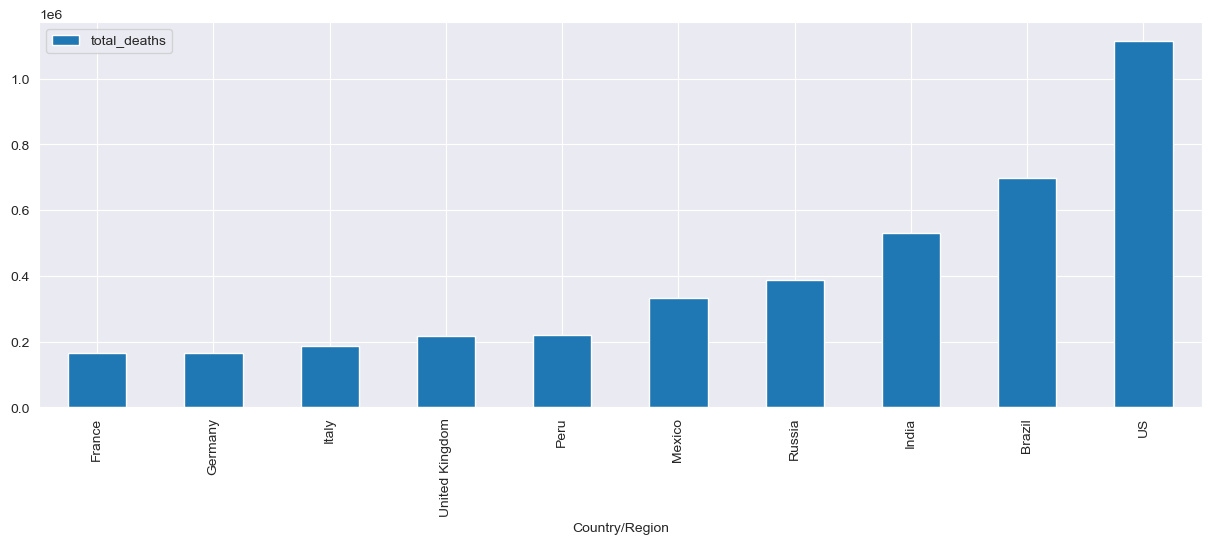

In [254]:
raw_global_deaths[['Country/Region','total_deaths']].sort_values(['total_deaths']).tail(10).plot(x='Country/Region',
                                                                               y='total_deaths',
                                                                               kind='bar',
                                                                               figsize=(15,5))
plt.show()

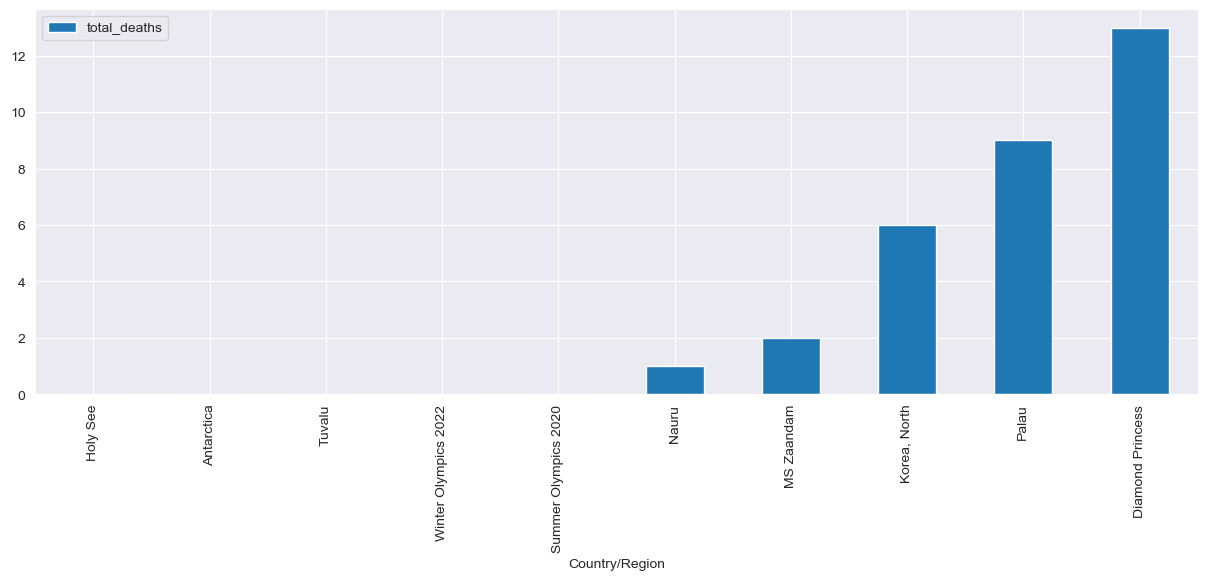

In [255]:
raw_global_deaths[['Country/Region','total_deaths']].sort_values(['total_deaths']).head(10).plot(x='Country/Region',
                                                                               y='total_deaths',
                                                                               kind='bar',
                                                                               figsize=(15,5))
plt.show()

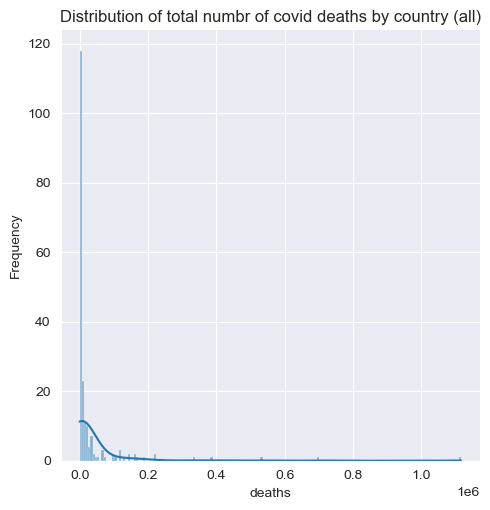

In [309]:
# plot a histogram of 'total deaths' for countries
# plt.hist(raw_global_deaths['total_deaths'], bins = 20)
sns.displot(raw_global_deaths['total_deaths'], kde=True)
# add title and labels
plt.title('Distribution of total numbr of covid deaths by country (all)')
plt.xlabel('deaths')
plt.ylabel('Frequency')
# display the plot
plt.show()

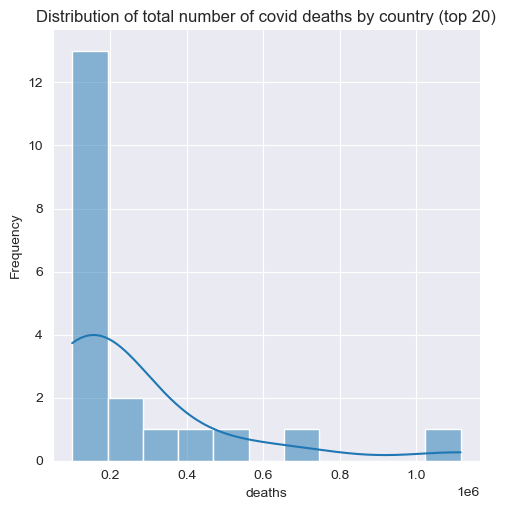

In [308]:
# plot a histogram of 'total deaths' for top 50 countries
# plt.hist(raw_global_deaths['total_deaths'].sort_values().tail(20), bins = 5)
sns.displot(raw_global_deaths['total_deaths'].sort_values().tail(20), kde=True)
# add title and labels
plt.title('Distribution of total number of covid deaths by country (top 20)')
plt.xlabel('deaths')
plt.ylabel('Frequency')
# display the plot
plt.show()

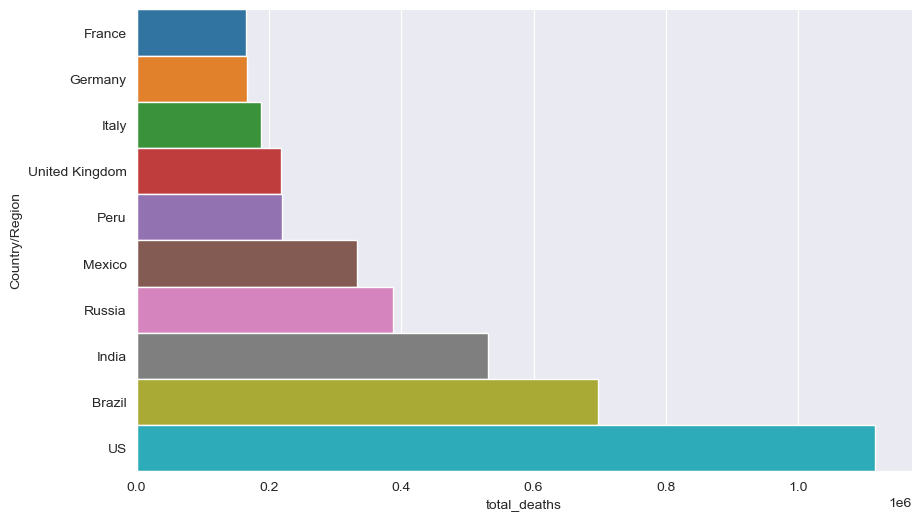

In [301]:
plt.figure(figsize=(10,6))
sns.barplot(data=raw_global_deaths[['Country/Region','total_deaths']].sort_values('total_deaths').tail(10),y='Country/Region',x='total_deaths', width = 1, dodge=False)
plt.show()

In [376]:
world_time_series = raw_global_deaths.rename({"Country/Region": "date"}, axis='columns').set_index('date').T.head(-1)

In [408]:
top_10_world_time_series = world_time_series[['US', 'Brazil', 'India', 'Russia', 'Mexico', 'Peru', 'United Kingdom', 'Italy', 'Germany', 'France']]

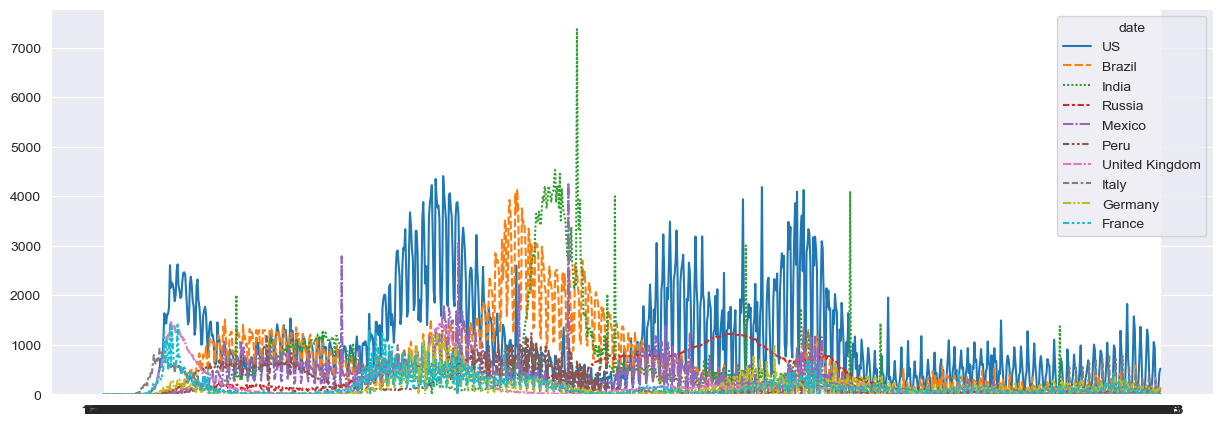

In [413]:
plt.figure(figsize=(15,5))
sns.lineplot(top_10_world_time_series)
plt.ylim(0, None)
plt.show()

<AxesSubplot: xlabel='date', ylabel='date'>

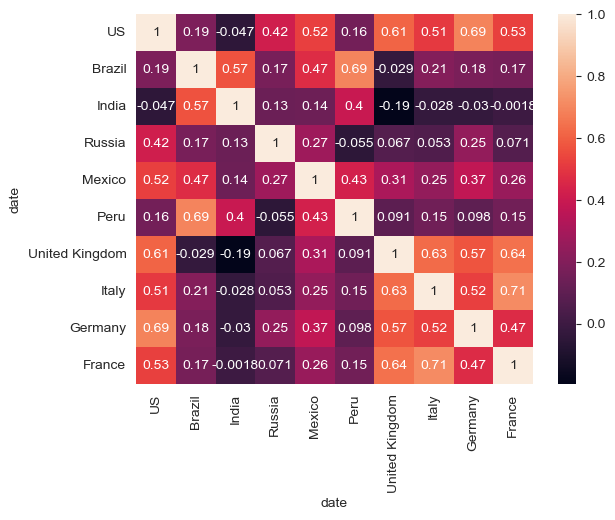

In [409]:
sns.heatmap(top_10_world_time_series.corr(), annot=True)

# lets just look at the US data

### Questions to explore: 
 - What is the total number of deaths from covid in the US?
 - What is the Distribution of the daily death counts? 
 - What is the mean and standard deviation of number of daily deaths from covid in the US?
 - What is the trend in deaths in the US from covid like over the duration of the pandemic?
 

In [298]:
US_time_series = raw_global_deaths[raw_global_deaths['Country/Region']=='US'].T.rename_axis('date').head(-1).tail(-1)

In [349]:
# rename column 1
US_time_series.rename(columns={186: "daily_deaths"}, inplace=True)

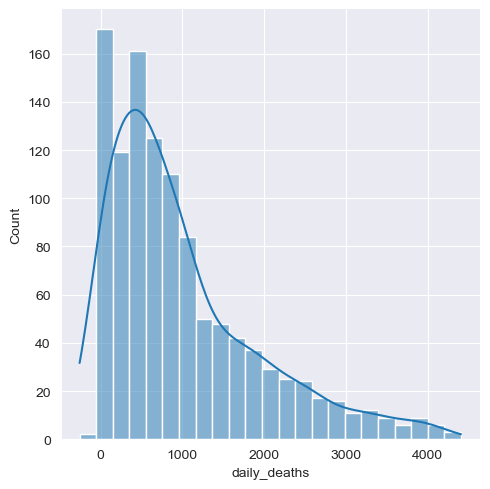

In [353]:
# histogram of data set
sns.displot(US_time_series['daily_deaths'], kde=True)

In [356]:
US_time_series['daily_deaths'].sum()

1115564

In [354]:
US_time_series['daily_deaths'].mean()

1000.5058295964126

In [355]:
US_time_series['daily_deaths'].std()

931.1271092807036

In [361]:
US_time_series.describe()

,daily_deaths
count,1115
unique,851
top,0
freq,34


In [357]:
# mean daily death count over the last 100 days
US_time_series['daily_deaths'].iloc[-100:,].mean()

427.41

--The distribution of daily deaths in the US is right skewed.   
Lets check the trend in the US Covid death rate by plotting number of deaths over time

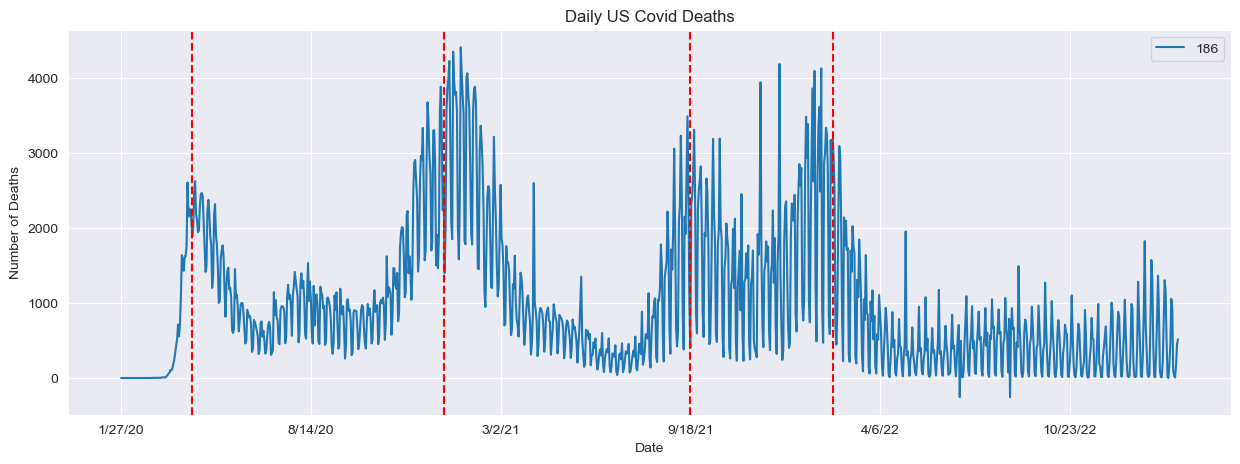

In [331]:
#ploting daily US covid deaths and major CDC events
US_time_series.plot(figsize=(15,5))
plt.axvline(75, linestyle = '--', color = 'red') # US nationawide shelter in place order
plt.axvline(340, linestyle = '--', color = 'red') # EUA for first vaccine
plt.axvline(600, linestyle = '--', color = 'red') # EUA for first booster
plt.axvline(750, linestyle = '--', color = 'red') # EUA for second booster
plt.title('Daily US Covid Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')

plt.show()

# Time Series Analysis

In [ ]:
import statsmodels